# COMPARING CUBE AND EXACT

In [108]:
import matplotlib.pyplot as plt
import json

def from_json(filename):
    out_file = open(filename)
    return json.load(out_file)

    
def difference_in_single_component(jsonfilename, benchmark):
    cases = from_json(jsonfilename)
    diff_counts = {}
    total_diff_sum = 0  
    for case in cases:
        lc_benchmark = case[benchmark]
        lc_cube = case["lincomb_cube"]
        this_case_diff = 0
        dim = len(lc_benchmark)
        for i in range(dim):
            diff = floor(abs(lc_benchmark[i] - lc_cube[i]))
            if diff >= 1:
                this_case_diff += diff
                if diff in diff_counts:
                    diff_counts[diff] += 1
                else:
                    diff_counts[diff] = 1
        total_diff_sum += this_case_diff
        # if this_case_diff > 5:
        #     print("\n this case diff ", this_case_diff)
        #     print(lc_LLL)
        #     print(lc_cube)

    print(f"\033[1mTotal sum of all differences: {total_diff_sum}\033[0m")
    # Calculate ratios between consecutive diff counts
    diffs = sorted(diff_counts.keys())
    counts = [diff_counts[diff] for diff in diffs]
    ratios = [f"{float(counts[i])/float(counts[i-1]):.2f}" if i != 0 else "-" for i in range(len(counts))]

    # Print the occurrences in a table format with ratios
    print("Difference | Frequency | Ratio (Current/Previous)")
    print("-" * 42)
    for diff, ratio in zip(diffs, ratios):
        print(f"{diff:>10} | {diff_counts[diff]:>10} | {ratio:>20}")
    
    # Prepare data for plotting
    diffs = list(diff_counts.keys())
    counts = [diff_counts[diff] for diff in diffs]
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.bar(diffs, counts, color='blue')
    plt.xlabel('Difference Value')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Differences in a single component Greater than 1, comparing with {benchmark}')
    plt.xticks(diffs)
    # plt.yscale('log')  # Set the y-axis to logarithmic scale
    # plt.savefig("dummyplot.svg", format='svg')
    plt.show()



file1 = "matrices3x3-600instances.json"
file2 = "matrices6x6-12000instances.json"



In [109]:
file3 = "broken_matrices_3x3_10000_tries.json"
file4 = "basic_cube_nonf_matrices_6x6_10000_tries_100_perimeter.json"
file5 = "broken_matrices_10x10_10000_tries.json"
file6 = "broken_matrices_20x20_10000_tries_1000_perimeter.json"


n=1000 #tries

In [110]:
def difference_in_all_components(jsonfilename, benchmark):
    cases = from_json(jsonfilename)
    diff_counts = {}
    total_diff_sum = 0 
    for case in cases:
        lc_benchmark = case[benchmark]
        lc_cube = case["lincomb_cube"]
        this_case_diff = 0
        dim = len(lc_benchmark)
        for i in range(dim):
            diff = floor(abs(lc_benchmark[i] - lc_cube[i]))
            if diff >= 1:
                this_case_diff += diff
        if this_case_diff in diff_counts:
            diff_counts[this_case_diff] += 1
        else:
            diff_counts[this_case_diff] = 1
        total_diff_sum += this_case_diff

    print(f"\033[1mTotal sum of all differences: {total_diff_sum}\033[0m")

    # Calculate ratios between consecutive diff counts
    diffs = sorted(diff_counts.keys())
    counts = [diff_counts[diff] for diff in diffs]
    ratios = [f"{float(counts[i])/float(counts[i-1]):.2f}" if i != 0 else "-" for i in range(len(counts))]
    occurence = [diff_counts[diff]/n for diff in diffs]
    # print(f"{diff:>10} | {diff_counts[diff]:>10} | {ratios[diff]:>20} | {occurence:.2f}")

    # Print the occurrences in a table format with ratios
    print("Difference | Frequency | Ratio (Current/Previous) | Occurrence per tries")
    print("-" * 65)
    for diff, ratio in zip(diffs, ratios):
        print(f"{diff:>10} | {diff_counts[diff]:>10} | {ratio:>20}")
    
    # Prepare data for plotting
    diffs = list(diff_counts.keys())
    counts = [diff_counts[diff] for diff in diffs]
    
    # Plotting
    plt.figure(figsize=(20, 5))
    plt.bar(diffs, counts, color='blue')
    plt.xlabel('Difference Value')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Differences throughout all components Greater than 1, {benchmark}')
    plt.xticks(diffs)
    # plt.yscale('log')  # Set the y-axis to logarithmic scale
    # plt.savefig("dummyplot.svg", format='svg')
    plt.show()

Total sum of all differences: 132
Difference | Frequency | Ratio (Current/Previous) | Occurrence per tries
-----------------------------------------------------------------
         1 |         17 |                    -
         2 |         13 |                 0.76
         3 |          6 |                 0.46
         5 |          3 |                 0.50
         7 |          2 |                 0.67
         8 |          1 |                 0.50
        11 |          2 |                 2.00
        12 |          1 |                 0.50


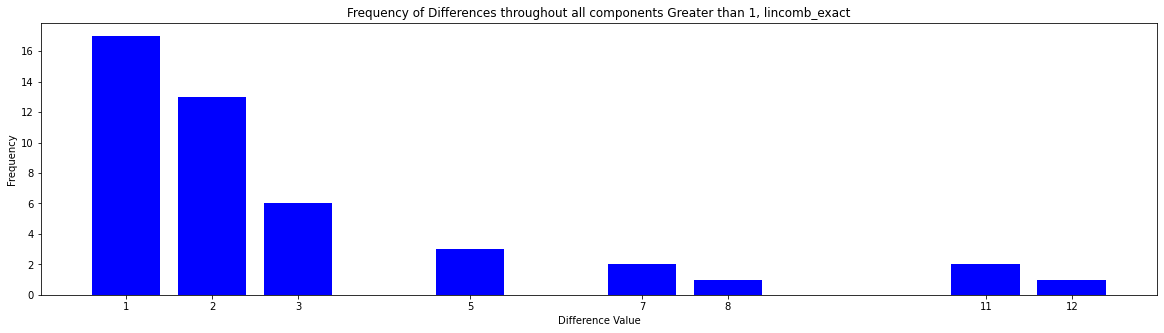

Total sum of all differences: 132
Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |         79 |                    -
         2 |         19 |                 0.24
         3 |          2 |                 0.11
         4 |          1 |                 0.50
         5 |          1 |                 1.00


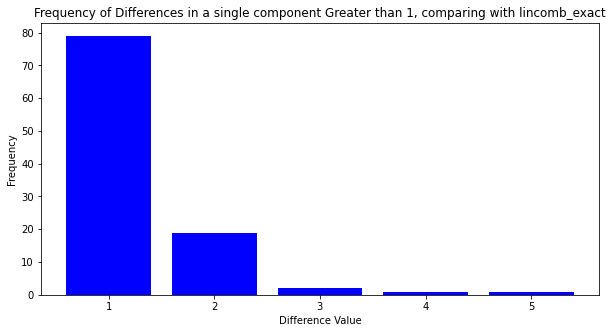

Total sum of all differences: 132
Difference | Frequency | Ratio (Current/Previous) | Occurrence per tries
-----------------------------------------------------------------
         1 |         17 |                    -
         2 |         13 |                 0.76
         3 |          6 |                 0.46
         5 |          3 |                 0.50
         7 |          2 |                 0.67
         8 |          1 |                 0.50
        11 |          2 |                 2.00
        12 |          1 |                 0.50


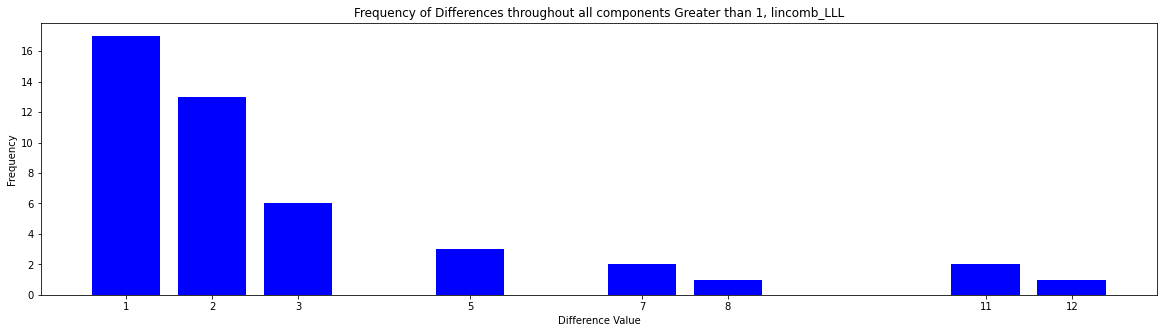

Total sum of all differences: 132
Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |         79 |                    -
         2 |         19 |                 0.24
         3 |          2 |                 0.11
         4 |          1 |                 0.50
         5 |          1 |                 1.00


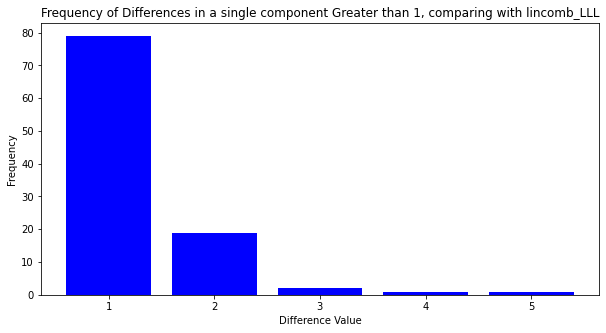

In [114]:
n=1000
difference_in_all_components("dummyfile.json", "lincomb_exact")
difference_in_single_component("dummyfile.json", "lincomb_exact")
difference_in_all_components("dummyfile.json", "lincomb_LLL")
difference_in_single_component("dummyfile.json", "lincomb_LLL")


In [112]:
difference_in_single_component(file4)
difference_in_all_components(file4)

TypeError: difference_in_single_component() missing 1 required positional argument: 'benchmark'

In [ ]:
difference_in_single_component(file3)
difference_in_all_components(file3)

FileNotFoundError: [Errno 2] No such file or directory: 'broken_matrices_3x3_10000_tries.json'

Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |      10368 |                    -
         2 |       4437 |                 0.43
         3 |       1277 |                 0.29
         4 |        466 |                 0.36
         5 |        212 |                 0.45
         6 |        146 |                 0.69
         7 |         62 |                 0.42
         8 |         41 |                 0.66
         9 |         31 |                 0.76
        10 |         20 |                 0.65
        11 |         12 |                 0.60
        12 |          8 |                 0.67
        13 |          8 |                 1.00
        14 |          5 |                 0.62
        15 |          5 |                 1.00
        16 |          2 |                 0.40
        17 |          3 |                 1.50
        18 |          1 |                 0.33
        21 |          1 |                 1.00
        22 |  

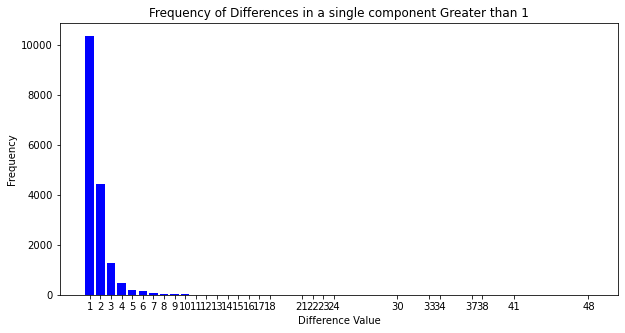

Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |        408 |                    -
         2 |       1097 |                 2.69
         3 |       1340 |                 1.22
         4 |        983 |                 0.73
         5 |        686 |                 0.70
         6 |        443 |                 0.65
         7 |        276 |                 0.62
         8 |        172 |                 0.62
         9 |        137 |                 0.80
        10 |        100 |                 0.73
        11 |         67 |                 0.67
        12 |         40 |                 0.60
        13 |         52 |                 1.30
        14 |         34 |                 0.65
        15 |         20 |                 0.59
        16 |         27 |                 1.35
        17 |         22 |                 0.81
        18 |         19 |                 0.86
        19 |          9 |                 0.47
        20 |  

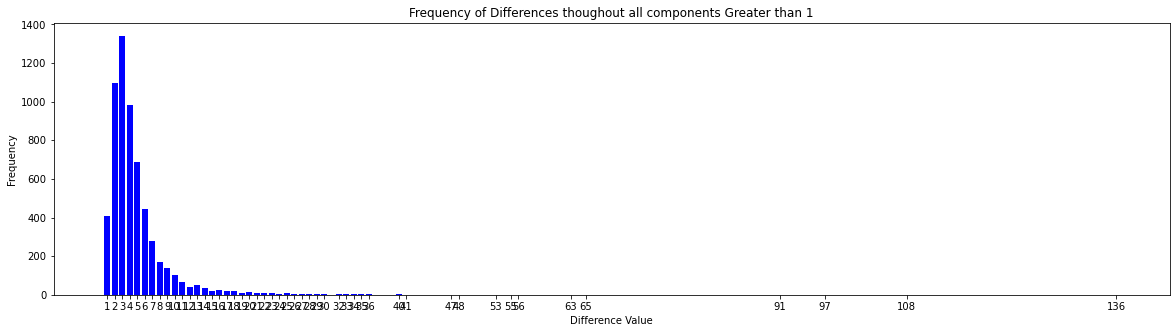

In [ ]:
difference_in_single_component(file2)
difference_in_all_components(file2)

Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |      10200 |                    -
         2 |       1645 |                 0.16
         3 |        495 |                 0.30
         4 |        201 |                 0.41
         5 |         91 |                 0.45
         6 |         55 |                 0.60
         7 |         29 |                 0.53
         8 |         19 |                 0.66
         9 |         11 |                 0.58
        10 |          8 |                 0.73
        11 |          6 |                 0.75
        12 |          5 |                 0.83
        13 |          4 |                 0.80
        14 |          4 |                 1.00
        15 |          2 |                 0.50
        16 |          2 |                 1.00
        17 |          3 |                 1.50
        19 |          1 |                 0.33
        22 |          2 |                 2.00
        23 |  

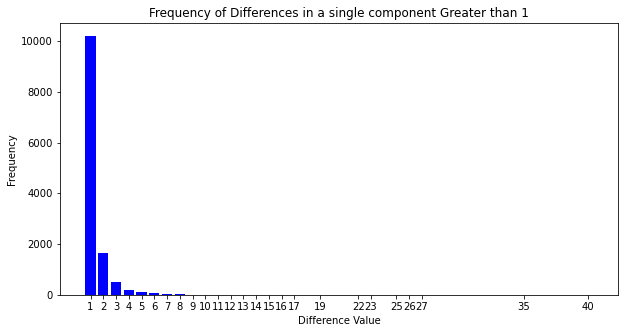

Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |       1881 |                    -
         2 |       1125 |                 0.60
         3 |        623 |                 0.55
         4 |        380 |                 0.61
         5 |        239 |                 0.63
         6 |        143 |                 0.60
         7 |        106 |                 0.74
         8 |         90 |                 0.85
         9 |         82 |                 0.91
        10 |         51 |                 0.62
        11 |         44 |                 0.86
        12 |         31 |                 0.70
        13 |         26 |                 0.84
        14 |         24 |                 0.92
        15 |         16 |                 0.67
        16 |         16 |                 1.00
        17 |         17 |                 1.06
        18 |         15 |                 0.88
        19 |          8 |                 0.53
        20 |  

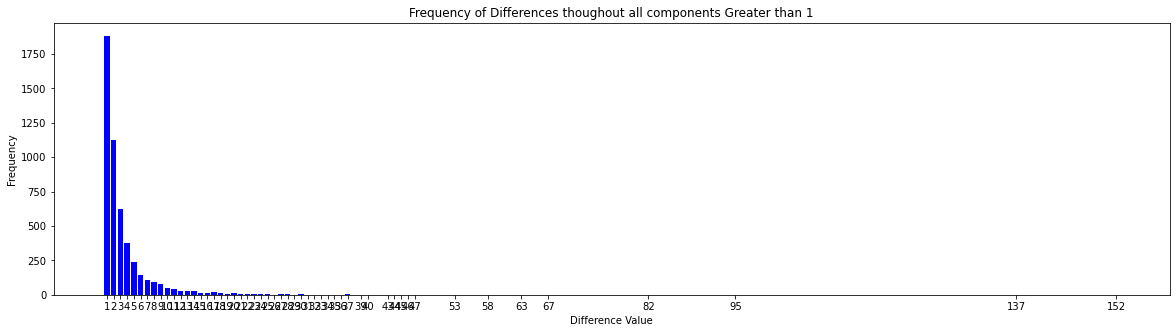

In [ ]:
difference_in_single_component(file5)
difference_in_all_components(file5)

Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |      27954 |                    -
         2 |       5486 |                 0.20
         3 |       1923 |                 0.35
         4 |        837 |                 0.44
         5 |        434 |                 0.52
         6 |        275 |                 0.63
         7 |        157 |                 0.57
         8 |        106 |                 0.68
         9 |         81 |                 0.76
        10 |         57 |                 0.70
        11 |         37 |                 0.65
        12 |         41 |                 1.11
        13 |         26 |                 0.63
        14 |         26 |                 1.00
        15 |         13 |                 0.50
        16 |         17 |                 1.31
        17 |         13 |                 0.76
        18 |          9 |                 0.69
        19 |          8 |                 0.89
        20 |  

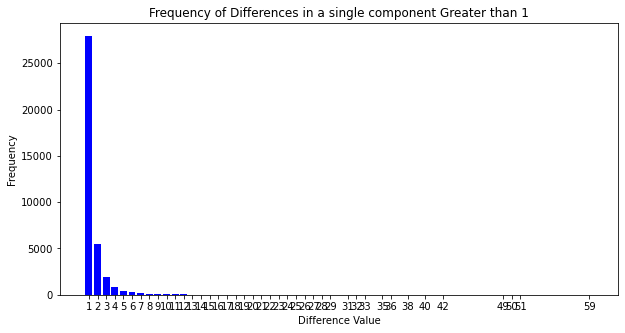

Difference | Frequency | Ratio (Current/Previous)
------------------------------------------
         1 |       1830 |                    -
         2 |       1353 |                 0.74
         3 |        926 |                 0.68
         4 |        696 |                 0.75
         5 |        565 |                 0.81
         6 |        388 |                 0.69
         7 |        335 |                 0.86
         8 |        276 |                 0.82
         9 |        200 |                 0.72
        10 |        163 |                 0.81
        11 |        150 |                 0.92
        12 |        120 |                 0.80
        13 |         89 |                 0.74
        14 |         91 |                 1.02
        15 |         87 |                 0.96
        16 |         64 |                 0.74
        17 |         55 |                 0.86
        18 |         52 |                 0.95
        19 |         51 |                 0.98
        20 |  

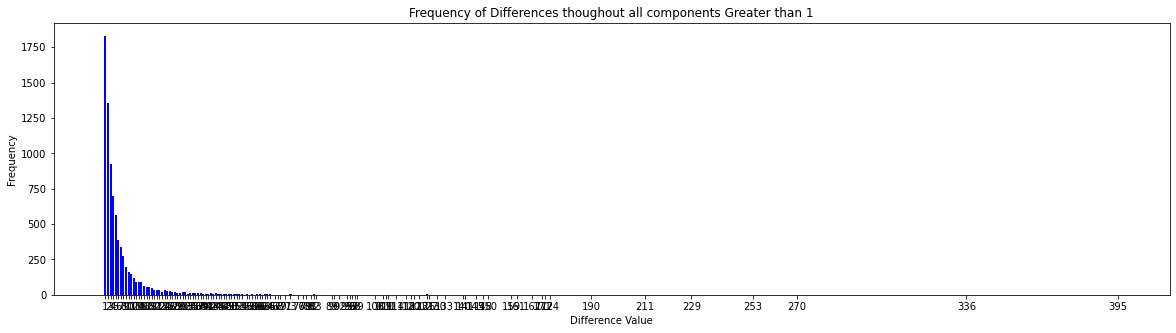

In [ ]:
difference_in_single_component(file6)
difference_in_all_components(file6)